02 Visualize reality check
===
Line chart one country all waves ~4 questions Female/Male + reality 

Note: the usp is, multiple questions at once (unlike violine) and good time-series representation (unlike radar) and reality added (unlike both former)

(Optional:
    coulor map when is which sex the better/worse predictor  (siehe anteil grün produzierter Strom am Verbrauch)
    lr forcast future/missing values
    lr to evaluate most predictive questions for reality/country/sex
)

In [2]:
#library
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
dfWVS = pd.read_csv('..//data//WVS_cleaned_10.csv')
HDR = pd.read_csv('..//data//HDR.csv')

#define variables
list3Countries=['Germany','China','Turkey']
list5Countries=['Germany','China','Turkey','Nigeria','Peru']
list10Countries =['Germany','China','Turkey','Nigeria','Peru','Iran','United States','Serbia','South Africa','Pakistan']
listGenderQuestions=['job', 'politician', 'university']
listDemographicQuestions=['sex', 'age', 'ethnic', 'status']
listIDColummns=['wave', 'wave_years', 'country', 'respondent_number', 'year']
listCountries = list10Countries
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']
listYears = ['1994-1998','1999-2004','2005-2009','2010-2014','2017-2022']

1. Plot answers to job, uni, politician question per country over time 
2. Add Gender
3. Add ErrorBars
4. Add GII (2nd y axis!)
5. optional: adjust step size of GII
6. optional: subdata from GII (avr years edu, %parliament, %jobs)

Data preprocessing for plots part 1: dfWVS

In [4]:
listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']
gender = ['Male', 'Female']
questions = ['university', 'politician', 'job']


def generate_table_per_country(data, country):
    data_country = []

    for wave in listWaves:
        one_wave = data[(data['wave'] == wave) & (data['country'] == country)]

        for sex in gender:
            one_gender = one_wave[one_wave['sex'] == sex]

            wave_data = {
                'Wave': wave,
                'Sex': sex,
                'Job': one_gender['job'].mean() / one_gender['job'].max(),
                'University': one_gender['university'].mean() / one_gender['university'].max(),
                'Politician': one_gender['politician'].mean() / one_gender['politician'].max()
            }

            data_country.append(wave_data)

    # Convert the list of dicts to a DataFrame
    df = pd.DataFrame(data_country)

    return df


countries = ['Germany', 'China', 'Nigeria', 'Turkey', 'Iran', 'Serbia']

# Example usage for Germany
germany_table = generate_table_per_country(dfWVS, 'Germany')
print(germany_table)
china_table = generate_table_per_country(dfWVS, 'China')
nigeria_table = generate_table_per_country(dfWVS, 'Nigeria')
turkey_table = generate_table_per_country(dfWVS, 'Turkey')
iran_table = generate_table_per_country(dfWVS, 'Iran')
serbia_table = generate_table_per_country(dfWVS, 'Serbia')

   Wave     Sex       Job  University  Politician
0  WVS3    Male  0.793360    0.792267    0.765400
1  WVS3  Female  0.823946    0.835547    0.806057
2  WVS4    Male       NaN         NaN         NaN
3  WVS4  Female       NaN         NaN         NaN
4  WVS5    Male  0.797747    0.776882    0.736559
5  WVS5  Female  0.846567    0.842923    0.827100
6  WVS6    Male  0.805486    0.811721    0.756858
7  WVS6  Female  0.867037    0.870000    0.833056
8  WVS7    Male  0.879459    0.863007    0.819188
9  WVS7  Female  0.915254    0.910632    0.863636


Data preprocessing for plots part 2: HDR & GII

In [10]:
#print(HDR)
hdr_ger = [HDR[HDR["code"]=="GER"]['gii'].values, HDR[HDR["code"]=="GER"]['year'].values]
hdr_chn = [HDR[HDR["code"]=="CHN"]['gii'].values, HDR[HDR["code"]=="CHN"]['year'].values]
hdr_tur = [HDR[HDR["code"]=="TUR"]['gii'].values, HDR[HDR["code"]=="TUR"]['year'].values]
hdr_nga = [HDR[HDR["code"]=="NGA"]['gii'].values, HDR[HDR["code"]=="NGA"]['year'].values]
hdr_per = [HDR[HDR["code"]=="PER"]['gii'].values, HDR[HDR["code"]=="PER"]['year'].values]
hdr_irn = [HDR[HDR["code"]=="IRN"]['gii'].values, HDR[HDR["code"]=="IRN"]['year'].values]
hdr_usa = [HDR[HDR["code"]=="USA"]['gii'].values, HDR[HDR["code"]=="USA"]['year'].values]
hdr_srb = [HDR[HDR["code"]=="SRB"]['gii'].values, HDR[HDR["code"]=="SRB"]['year'].values]
hdr_zaf = [HDR[HDR["code"]=="ZAF"]['gii'].values, HDR[HDR["code"]=="ZAF"]['year'].values]
hdr_pak = [HDR[HDR["code"]=="PAK"]['gii'].values, HDR[HDR["code"]=="PAK"]['year'].values]

print(hdr_chn)


Plot answers to all three questions per gender 

In [6]:
def plot_country_data(data, countryname):
        male_colors = ['darkgreen', 'darkcyan', 'orange']
        female_colors = ['lightgreen', 'cyan', 'yellow']

        #fig, ax = plt.subplots(figsize=(10, 6))
        
        for i, (question, male_color, female_color) in enumerate(zip(data.columns[2:], male_colors, female_colors)):
                male_data = data[data['Sex'] == 'Male'][question]
                female_data = data[data['Sex'] == 'Female'][question]
                #plt.ylim(0.35, 0.95)
                plt.plot(data[data['Sex'] == 'Male']['Wave'], male_data,
                        label=f"Male - {question}", color=male_color)
                plt.plot(data[data['Sex'] == 'Female']['Wave'], female_data,
                        label=f"Female - {question}", color=female_color)

                # Calculate standard errors
                male_std = male_data.std()
                female_std = female_data.std()

                # Plot standard error bars
                plt.errorbar(data[data['Sex'] == 'Male']['Wave'], male_data,
                                yerr=male_std, fmt='none', color=male_color, capsize=5, alpha=0.3)
                plt.errorbar(data[data['Sex'] == 'Female']['Wave'], female_data,
                                yerr=female_std, fmt='none', color=female_color, capsize=5, alpha=0.3)

        plt.xlabel('Wave')
        plt.ylabel('Normalized Answer')
        plt.title(f'Comparison of Questions Over Time in {countryname}')
        #plt.legend()
        #plt.tight_layout
        #plt.legend()    
        #plt.show()


get min/max for y axis

In [7]:
print(germany_table.min())
print(china_table.min())
print(nigeria_table.min()) #Politician    0.384511
print(turkey_table.min())
print(iran_table.min())
print(serbia_table.min())

print(germany_table.max()) # Job           0.915254
print(china_table.max())
print(nigeria_table.max()) 
print(turkey_table.max())
print(iran_table.max())
print(serbia_table.max())


Wave              WVS3
Sex             Female
Job            0.79336
University    0.776882
Politician    0.736559
dtype: object
Wave              WVS3
Sex             Female
Job           0.623733
University    0.687606
Politician    0.576825
dtype: object
Wave              WVS3
Sex             Female
Job           0.463227
University    0.595109
Politician    0.384511
dtype: object
Wave              WVS3
Sex             Female
Job           0.531157
University    0.699555
Politician     0.49592
dtype: object
Wave              WVS3
Sex             Female
Job           0.453547
University    0.566512
Politician    0.467061
dtype: object
Wave              WVS3
Sex             Female
Job           0.676426
University    0.693694
Politician    0.559685
dtype: object
Wave              WVS7
Sex               Male
Job           0.915254
University    0.910632
Politician    0.863636
dtype: object
Wave              WVS7
Sex               Male
Job           0.739617
University    0.780812
Polit

Call for all countries

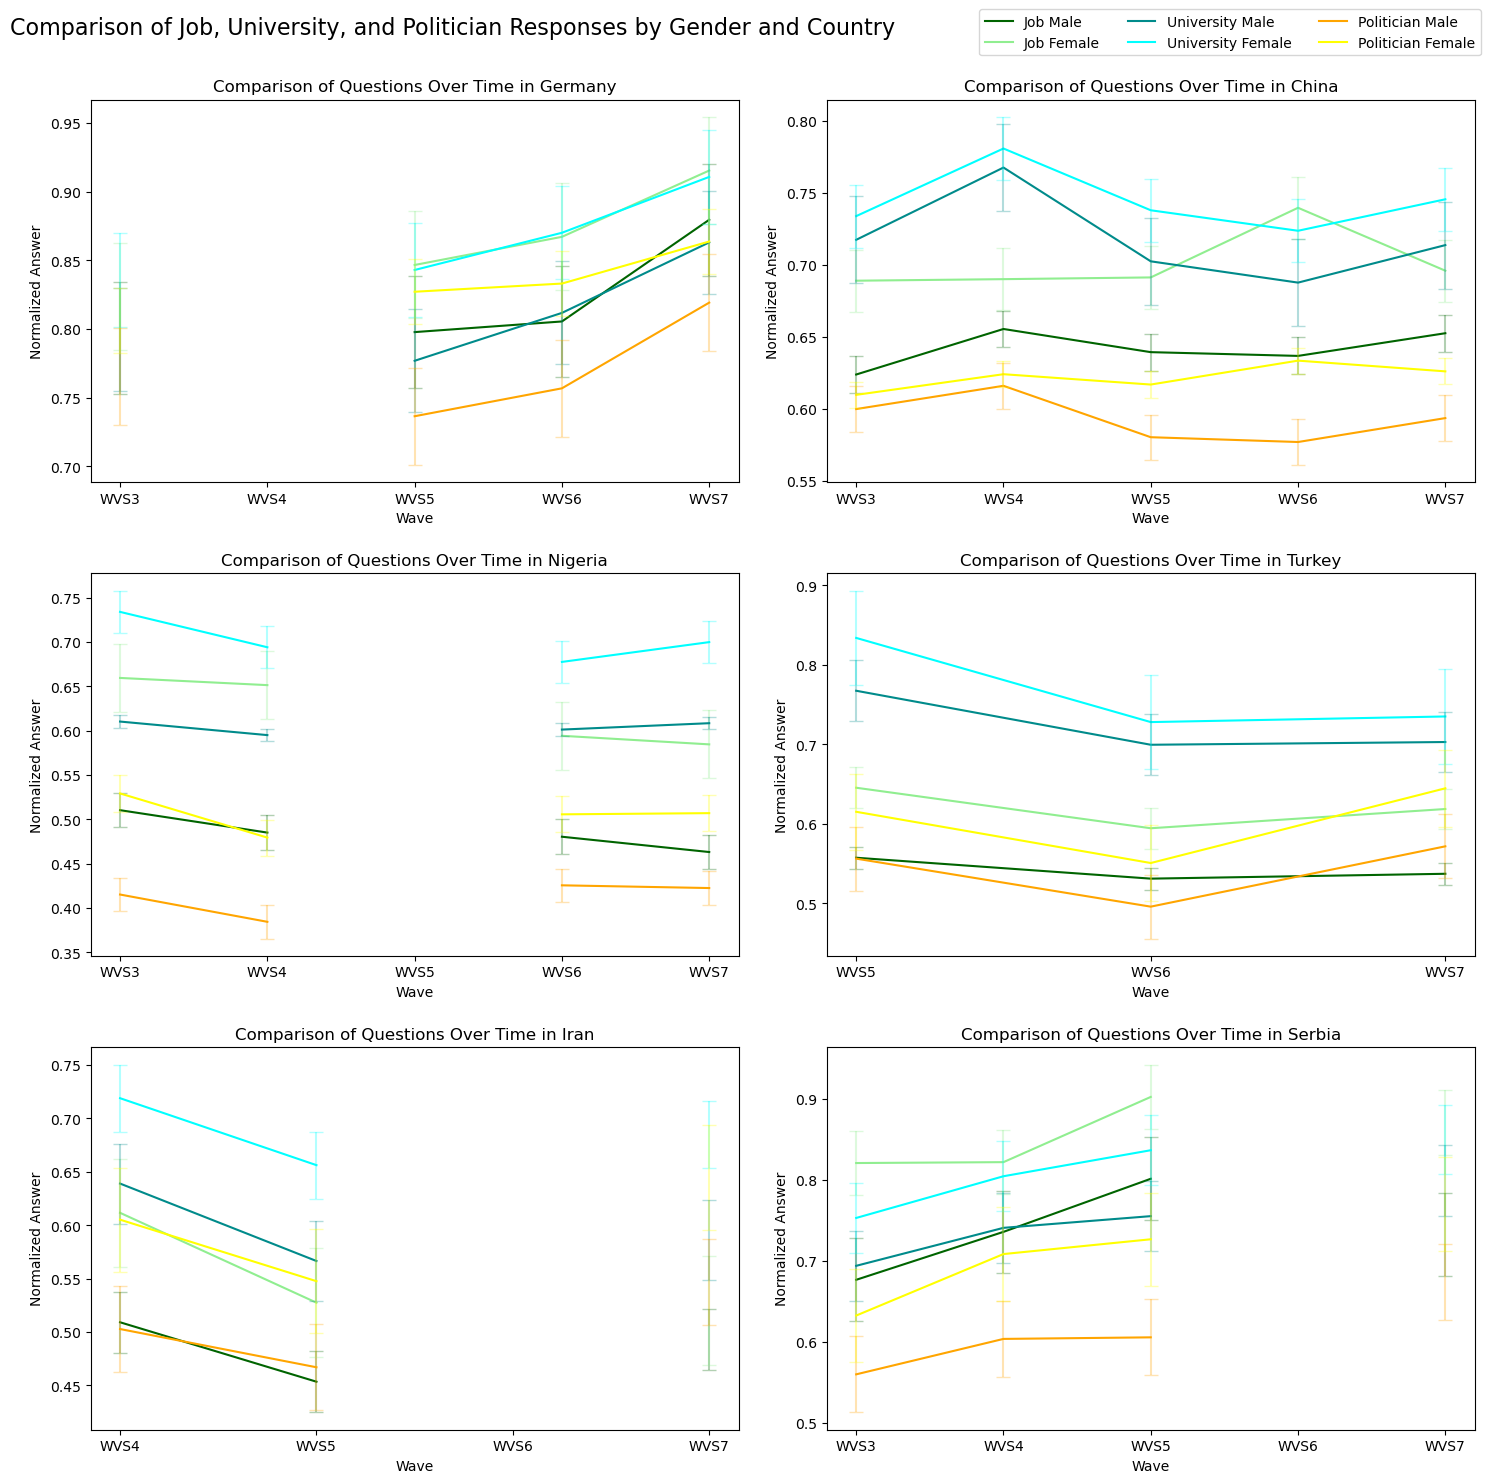

In [8]:
country_tables = {
    'Germany': germany_table,
    'China': china_table,
    'Nigeria': nigeria_table,
    'Turkey': turkey_table,
    'Iran': iran_table,
    'Serbia': serbia_table
}

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplot(321)
plot_country_data(germany_table, 'Germany')
plt.subplot(322)
plot_country_data(china_table, 'China')
plt.subplot(323)
plot_country_data(nigeria_table, 'Nigeria')
plt.subplot(324)
plot_country_data(turkey_table, 'Turkey')
plt.subplot(325)
plot_country_data(iran_table, 'Iran')
plt.subplot(326)
plot_country_data(serbia_table, 'Serbia')
labels = ['Job Male', 'Job Female', 
          'University Male', 'University Female', 
          'Politician Male', 'Politician Female']
fig.suptitle('Comparison of Job, University, and Politician Responses by Gender and Country', fontsize=16, x=0.3, y=0.99)

# Add a custom legend at the top right of the figure with two columns
fig.legend(loc='upper right', bbox_to_anchor=(0.99, 0.999), ncol=3, labels=labels)
plt.tight_layout(pad=2)
plt.show()



Insert GIIs


ValueError: not enough values to unpack (expected 2, got 0)

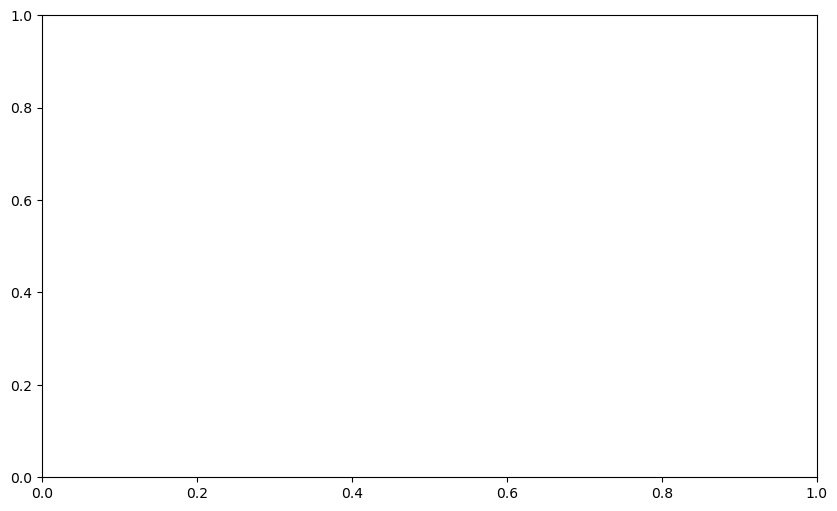

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already extracted GII data for different countries as you described
hdr_data = {
    'Germany': hdr_ger,
    'China': hdr_chn,
    'Turkey': hdr_tur,
    'Nigeria': hdr_nga,
    'Peru': hdr_per,
    'Iran': hdr_irn,
    'USA': hdr_usa,
    'Serbia': hdr_srb,
    'South Africa': hdr_zaf,
    'Pakistan': hdr_pak
}

# Find the common set of years for all countries
common_years = set(hdr_data['Germany'][1])
for country, gii_values in hdr_data.items():
    common_years = common_years.intersection(set(gii_values[1]))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for country, gii_values in hdr_data.items():
    years = gii_values[1]
    gii_values = [float(val) if val.replace('.', '', 1).isdigit() else np.nan for val in gii_values[0]]

    # Filter out missing values (NaN) and only plot data for the common set of years
    valid_data = [(year, gii) for year, gii in zip(years, gii_values) if year in common_years and not np.isnan(gii)]
    valid_years, valid_gii_values = zip(*valid_data)
    
    ax.plot(valid_years, valid_gii_values, label=country)

ax.set_xlabel('Year')
ax.set_ylabel('GII')
ax.set_title('Gender Inequality Index (GII) Over Time')
ax.legend()
plt.show()
